# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [12]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from seaborn import load_dataset

%matplotlib inline

In [22]:
#load dataset

tips = sns.load_dataset(('tips'))
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Thu, 27 Jun 2024   Prob (F-statistic):           1.52e-06
Time:                        11:13:05   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

(0.0, 0.505398619388979)

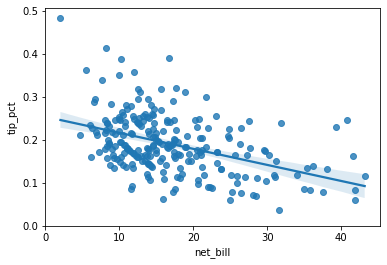

In [14]:
#tip_pct ~ net_bill

reg_tip = smf.ols('tip_pct ~ net_bill', data=tips).fit()
print(reg_tip.summary())

sns.regplot(
    data=tips[tips['tip_pct']<.5],
    x='net_bill',
    y='tip_pct'
)

plt.xlim(left=0)
plt.ylim(bottom=0)

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Thu, 27 Jun 2024   Prob (F-statistic):           1.62e-13
Time:                        11:59:05   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6181      0.054  

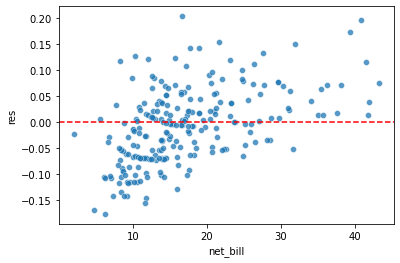

In [29]:
reg_tip = smf.ols('tip_pct ~ np.log(net_bill)', data=tips).fit()
print(reg_tip.summary())

tips['res'] = reg_tip.resid

sns.scatterplot(
    data=tips[tips['tip_pct']<.5],
    x='net_bill',
    y='res',
    alpha=.75
)

plt.axhline(y=0, color='r', linestyle='--')

<AxesSubplot:xlabel='tip_pct', ylabel='net_bill'>

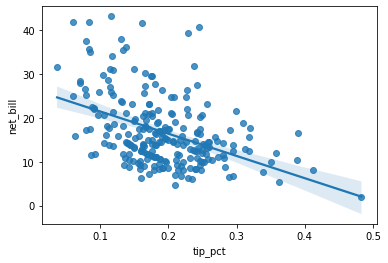

In [31]:
sns.regplot(x='tip_pct', y='net_bill',data=tips[tips['tip_pct']<.5])

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Thu, 27 Jun 2024   Prob (F-statistic):           1.06e-09
Time:                        11:28:27   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.48

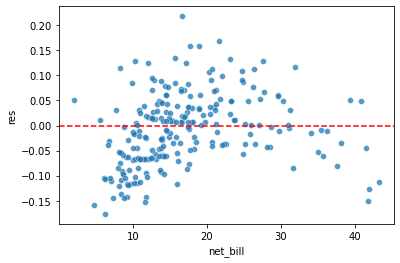

In [19]:
reg_tip = smf.ols('tip_pct ~ net_bill + np.power(net_bill,2)', data=tips).fit()
print(reg_tip.summary())

tips['res'] = reg_tip.resid

sns.scatterplot(
    data=tips[tips['tip_pct']<.5],
    x='net_bill',
    y='res',
    alpha=.75
)

plt.axhline(y=0, color='r', linestyle='--')

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Fri, 28 Jun 2024   Prob (F-statistic):           8.27e-16
Time:                        12:37:16   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2749      0.056    -22.872      0.0

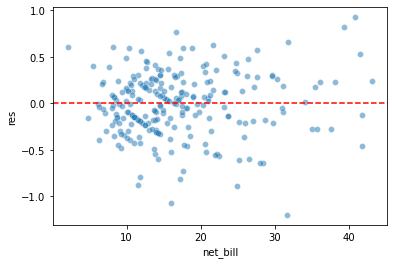

In [64]:
reg_tip = smf.ols('np.log(tip_pct) ~ net_bill', data=tips).fit()
print(reg_tip.summary())

tips['res'] = reg_tip.resid

sns.scatterplot(
    data=tips[tips['tip_pct']<.5],
    x='net_bill',
    y='res',
    alpha=.5
)

plt.axhline(y=0, color='r', linestyle='--')

In [65]:
tips['pred_tip'] = np.exp(reg_tip.fittedvalues)                     
r= tips[['pred_tip', 'tip_pct']].corr().iloc[1,0]
r**2

0.11440988592529767

In [66]:
r_squared = reg_tip.rsquared
r_squared

0.23534487140864324

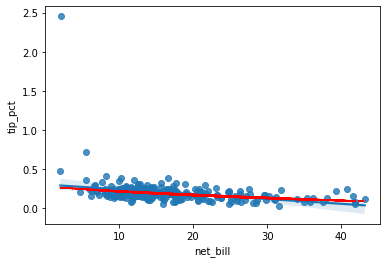

In [67]:
sns.regplot(x='net_bill', y='tip_pct', data=tips)
plt.plot(tips['net_bill'], tips['pred_tip'], 'r,--')

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Fri, 28 Jun 2024   Prob (F-statistic):           5.20e-20
Time:                        12:37:24   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133  

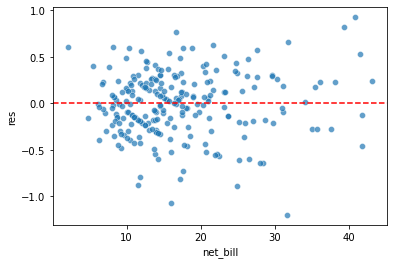

In [68]:
reg_tip = smf.ols('np.log(tip_pct) ~ np.log(net_bill)', data=tips).fit()
print(reg_tip.summary())

tips['resid'] = reg_tip.resid

sns.scatterplot(
    data=tips[tips['tip_pct']<.5],
    x='net_bill',
    y='res',
    alpha=.7
)

plt.axhline(y=0, color='r', linestyle='--')

In [69]:
tips['pred_tip'] = np.exp(reg_tip.fittedvalues)                     
r= tips[['pred_tip', 'tip_pct']].corr().iloc[1,0]
r**2

0.30894874740322265

In [70]:
r_squared = reg_tip.rsquared
r_squared

0.2934740215080778

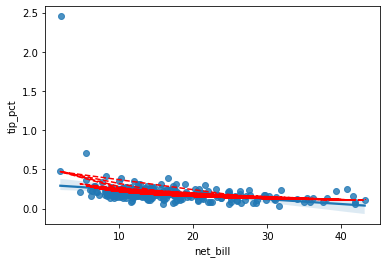

In [71]:
sns.regplot(x='net_bill', y='tip_pct', data=tips)
plt.plot(tips['net_bill'], tips['pred_tip'], 'r,--')

###  6. qual modelo resultou no melhor ajuste?

O modelo com o melhor ajuste é o "log do tip_pct em função do log de net_bill", pois possui a linha que melhor se ajusta aos pontos do gráfico.